
# California Housing Price Pridiction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

### Research Question: How can we use models to predict California housing price?

Do you want to know how much your house in California is worth? If you're a real estate company owner, would you like to have a model that predicts how much the house you're going to build will be worth? In this project, I will try to use different methods to find a reasonable model that can accurately predict housing prices in California.
The dataset used in this project contains prices for houses found in given California districts and some summary stats about them based on the 1990 census data. The goal in this analysis is to find out whether there are potential relationships between housing prices and other factors(i.e.house age, median_income, population, etc.), and predict the housing prices in California based on our model.

### Source of Data: 

The data contains information from the 1990 California census.
This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto).
And it is also available in the following URL link:
https://www.kaggle.com/camnugent/california-housing-prices

### Variables Description:   

There are 10 variables in the dataset, which contains information about the demography of the districts (income, population, number of houses occupied) as well as the location of the districts (latitude, longitude) and general information about the houses in the districts (number of rooms, number of bedrooms, age of the house).Because these statistics are at the district level, they correspond to averages or medians.  


# Project 1:


### Ourtcome(Y) and Predictive Covariates(X):

#### Linear Regression Model:

In the linear regression model, I will take Median house value for households within a block (measured in US Dollars) as the response variable (Y), and use median income for households within a block of houses (measured in tens of thousands of US Dollars) as the predictor variable.


#### Different plots showing variations of house values based on location:

Secondly, I will plot the house values based on locations (Values include: NEAR BAY, INLAND, NEAR OCEAN, ISLAND, <1H OCEAN), and see if there is a relationship exist between house value and location.


## Cleaning Data

First off, we need to clean our data so that we could efficiently analyse them.


In [3]:
df_house = pd.read_csv('C:/Users/amber/Desktop/Eco225/Code/housing.csv')
df_house.shape

(20640, 10)

We have 20640 observations with 10 columns in the dataset.

Then, we need to check if there exists missing values in the dataset.

In [4]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The result shows that there are 207 missing values existing in the "total_bedrooms" column. We want to fill the null values with the median.

In [5]:
## group the data by 20 values each block
df_house["households_gp"] = df_house["households"]//20
## filling the null values with the median
df_house["total_bedrooms"] = df_house["total_bedrooms"].fillna(df_house.groupby("households_gp")["total_bedrooms"].transform("median"))

In [6]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
households_gp         0
dtype: int64

Now, we have successfully fill the null values.  
But we still have one problem with the dataset: the "median_house_value" represents the median value of one house in a given block. However, some of the variables are representing the statistics for the whole block("total_rooms","total_bedrooms",and "population").Therefore, we want to change these "whole block" statistics into "one house" statistics.

In [7]:
## create new variables that represents for each households:
df_house["rooms_per_household"] = df_house["total_rooms"]/df_house["households"]
df_house["bedrooms_per_household"] = df_house["total_bedrooms"]/df_house["households"]
df_house["population_per_household"] = df_house["population"]/df_house["households"]


In [8]:
## copying the old dataframe and dropping some columns to draw a meaningful summary table:
df_summary = df_house.filter(["housing_median_age","median_income","median_house_value","rooms_per_household",
                      "bedrooms_per_household","population_per_household"], axis = 1)


## Summary Statistics

Now we want to see the statistical details of the dataset.

In [9]:
df_summary.describe()

housing_median_age  median_income  median_house_value  \
count        20640.000000   20640.000000        20640.000000   
mean            28.639486       3.870671       206855.816909   
std             12.585558       1.899822       115395.615874   
min              1.000000       0.499900        14999.000000   
25%             18.000000       2.563400       119600.000000   
50%             29.000000       3.534800       179700.000000   
75%             37.000000       4.743250       264725.000000   
max             52.000000      15.000100       500001.000000   

       rooms_per_household  bedrooms_per_household  population_per_household  
count         20640.000000            20640.000000              20640.000000  
mean              5.429000                1.096590                  3.070655  
std               2.474173                0.473748                 10.386050  
min               0.846154                0.333333                  0.692308  
25%               4.440716                1.006504                  2.429741  
50%               5.229129                1.048970                  2.818116  
75%               6.052381                1.098941                  3.282261  
max             141.909091               34.066667               1243.333333

The new variables we have created for each households seems problematic: the maximum population per households cannot be 1243.33,bedrooms per household is unlikely to be 34, and rooms per household is over 100.
Thus, we should drop some of the very exaggerated value but still keeping some plausible extreme observations:
we drop all the households whose rooms are more than 50, or whose bedrooms are more than 20, or whose polulation is more than 50.

In [10]:
## check the data out of range；
df_house.query("rooms_per_household > 50" )

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1912     -120.16     39.01                  16         1463           264.0   
1913     -120.06     39.01                  19         2967           528.0   
1914     -120.10     38.91                  33         1561           282.0   
1979     -120.08     38.80                  34         1988           511.0   
2395     -119.34     37.12                  23         1881           380.0   
9676     -119.02     37.64                  14         5919          1278.0   
11707    -120.06     39.15                  22         2213           372.0   
11862    -121.25     40.27                  25          958           245.0   
12447    -114.49     33.97                  17         2809           635.0   

       population  households  median_income  median_house_value  \
1912           54          26         4.9750              206300   
1913          112          48         4.0714              437500   
1914           30          11         1.8750              500001   
1979           36          15         4.6250              162500   
2395           64          37         3.8750              125000   
9676          265         112         3.2431              221400   
11707          98          42         1.1912              170000   
11862          28          16         2.6250               67500   
12447          83          45         1.6154               87500   

      ocean_proximity  households_gp  rooms_per_household  \
1912           INLAND              1            56.269231   
1913           INLAND              2            61.812500   
1914           INLAND              0           141.909091   
1979           INLAND              0           132.533333   
2395           INLAND              1            50.837838   
9676           INLAND              5            52.848214   
11707          INLAND              2            52.690476   
11862          INLAND              0            59.875000   
12447          INLAND              2            62.422222   

       bedrooms_per_household  population_per_household  
1912                10.153846                  2.076923  
1913                11.000000                  2.333333  
1914                25.636364                  2.727273  
1979                34.066667                  2.400000  
2395                10.270270                  1.729730  
9676                11.410714                  2.366071  
11707                8.857143                  2.333333  
11862               15.312500                  1.750000  
12447               14.111111                  1.844444

In [11]:
df_house.query("bedrooms_per_household > 20" )

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1914    -120.10     38.91                  33         1561           282.0   
1979    -120.08     38.80                  34         1988           511.0   

      population  households  median_income  median_house_value  \
1914          30          11          1.875              500001   
1979          36          15          4.625              162500   

     ocean_proximity  households_gp  rooms_per_household  \
1914          INLAND              0           141.909091   
1979          INLAND              0           132.533333   

      bedrooms_per_household  population_per_household  
1914               25.636364                  2.727273  
1979               34.066667                  2.400000

In [12]:
df_house.query("population_per_household > 50" )

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3364     -120.51     40.41                  36           36             8.0   
9172     -118.59     34.47                   5          538            98.0   
12104    -117.33     33.97                   8          152            19.0   
13034    -121.15     38.69                  52          240            44.0   
16420    -121.29     37.89                  26          161            27.0   
16669    -120.70     35.32                  46          118            17.0   
19006    -121.98     38.32                  45           19             5.0   

       population  households  median_income  median_house_value  \
3364         4198           7         5.5179               67500   
9172         8733         105         4.2391              154600   
12104        1275          20         1.6250              162500   
13034        6675          29         6.1359              225000   
16420        1542          30         5.7485              162500   
16669        6532          13         4.2639              350000   
19006        7460           6        10.2264              137500   

      ocean_proximity  households_gp  rooms_per_household  \
3364           INLAND              0             5.142857   
9172           INLAND              5             5.123810   
12104          INLAND              1             7.600000   
13034          INLAND              1             8.275862   
16420          INLAND              1             5.366667   
16669      NEAR OCEAN              0             9.076923   
19006          INLAND              0             3.166667   

       bedrooms_per_household  population_per_household  
3364                 1.142857                599.714286  
9172                 0.933333                 83.171429  
12104                0.950000                 63.750000  
13034                1.517241                230.172414  
16420                0.900000                 51.400000  
16669                1.307692                502.461538  
19006                0.833333               1243.333333

In [13]:
## drop the overly exaggerated outlier；
df_house = df_house.drop([1912,1913,1914,1979,2395,3364,9172,9676,11707,11862,12447,12104,13034,16420,16669,19006]).reset_index(drop = True)

In [14]:
## new summary table:
df_summary2 = df_house.filter(["housing_median_age","median_income","median_house_value","rooms_per_household",
                      "bedrooms_per_household","population_per_household"], axis = 1)

df_summary2.describe()

housing_median_age  median_income  median_house_value  \
count        20624.000000   20624.000000        20624.000000   
mean            28.641292       3.870481       206859.326998   
std             12.584853       1.899574       115391.058293   
min              1.000000       0.499900        14999.000000   
25%             18.000000       2.563400       119600.000000   
50%             29.000000       3.534600       179700.000000   
75%             37.000000       4.742725       264825.000000   
max             52.000000      15.000100       500001.000000   

       rooms_per_household  bedrooms_per_household  population_per_household  
count         20624.000000            20624.000000              20624.000000  
mean              5.398546                1.090245                  2.937585  
std               1.881275                0.322083                  0.942528  
min               0.846154                0.333333                  0.692308  
25%               4.440247                1.006504                  2.430205  
50%               5.227934                1.048944                  2.818295  
75%               6.051005                1.098836                  3.281917  
max              47.515152               11.181818                 41.214286

Even though the new maximum values for rooms_per_household, bedrooms_per_household, and population_per_household are still high, but they are more plausible now. In the median income summary statistics, we observe the huge income gap among districts in California: the minimum value is 4900 US dollars, and the maximum value is 150,000 US dollars. And about 75 percent of the median income values are less then 50,000 USD, we know that the majority of the households dose not have income higher than 50.000 USD.   
Look at the median house value summary statistics, the huge gap still exists: with minimum value of 14,999 USD and maximum value of 500,001 USD. Houses, as the most important investment for each households, also have a similar value pattern as the median income. Consequently, we want to dig into graphs of these two variables to investigate their relationship.

## Relations between Variables in Graphs

After cleaning the data, we would like to dig into the relations between possible independent variables(median_income, population, bedrooms per household, households)and dependent variable(median_house_value):

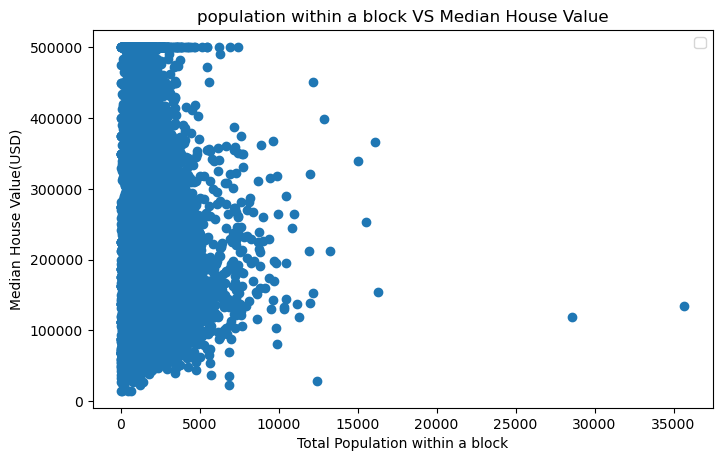

In [15]:
## check the relations bt median_house_value and population:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='population', y='median_house_value', style='o')
plt.title('population within a block VS Median House Value')
plt.xlabel('Total Population within a block')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

We could see that the most blocks are under 10000 people, and there is no obvious linear relationship between population and median house value.

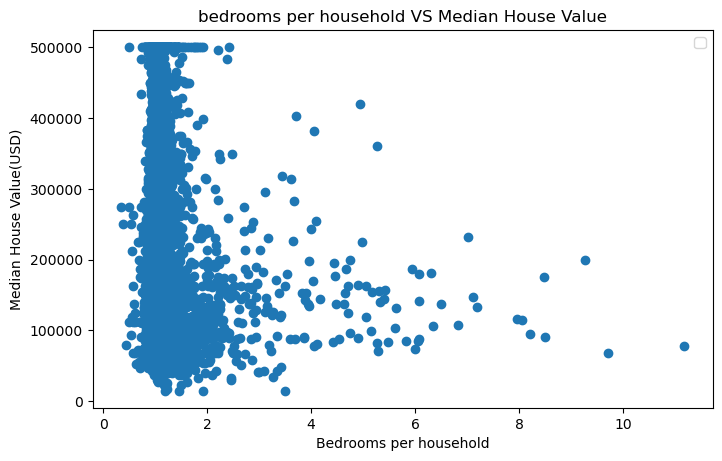

In [16]:
## check the relations bt median_house_value and bedrooms per household:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='bedrooms_per_household', y='median_house_value', style='o')
plt.title('bedrooms per household VS Median House Value')
plt.xlabel('Bedrooms per household')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

The plot shows the most households have around 1 to 4 bedrooms, and there is no obvious linear relationship between number of bedrooms per household and median house value.

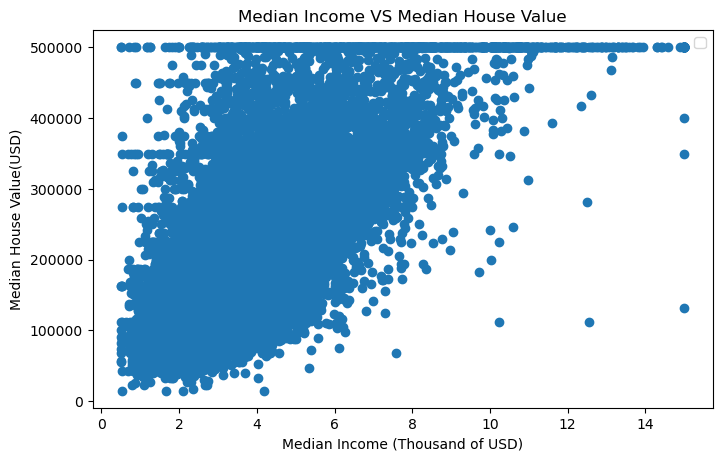

In [17]:
## check the relations bt median_house_value and median_income:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='median_income', y='median_house_value', style='o')
plt.title('Median Income VS Median House Value')
plt.xlabel('Median Income (Thousand of USD)')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

The plot is likely to show a strong linear relationship between median income and mdeian house value for each block of houses. However, the plot has some issues: there  are some horizontal lines of observations whose median house value are $500,000$, $450,000$, $350,000$, and $275,000$. The median house value in the line of $500,000$ could be problematic since there are very high values(worth more than $500,000$) of the house value but are set to $500,000$. To solve this problem and make the data looks more natural, I will drop these observations. Since our dataset is big enough, dropping those observations (aroung 1% of the total dataset) would be appropriate.

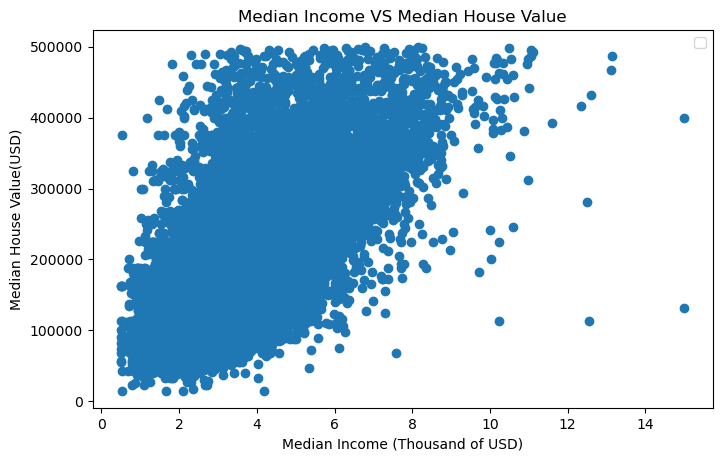

In [18]:
# drop observations in the line of 500,000, 450,000, 350,000, 275,000
df_house.drop(df_house.index[df_house['median_house_value'] >= 500000], inplace = True)
df_house.drop(df_house.index[df_house['median_house_value'] == 450000], inplace = True)
df_house.drop(df_house.index[df_house['median_house_value'] == 350000], inplace = True)
df_house.drop(df_house.index[df_house['median_house_value'] == 275000], inplace = True)
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='median_income', y='median_house_value', style='o')
plt.title('Median Income VS Median House Value')
plt.xlabel('Median Income (Thousand of USD)')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

The plot shows a positive median to strong linear relationship between median incom and median house value. We could probably use this relation to do a simple linear regression.

## Method 1: Simple Linear Regression

###  Goal: use simple linear regression to predict the house value(measured in tens of thousands of US Dollars) in California based upon median income(measured in US Dollars) per district. 

### step1: preparing the data

First, we are going to divide the data into attributes and labels, and then use python to divide our data into training and test datasets.


In [19]:
df_house_2 = df_house.drop(['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms',
               'population', 'ocean_proximity','households_gp','households','rooms_per_household','bedrooms_per_household',
                           'population_per_household'], axis=1)
df_house_2

median_income  median_house_value
0             8.3252              452600
1             8.3014              358500
2             7.2574              352100
3             5.6431              341300
4             3.8462              342200
...              ...                 ...
20619         1.5603               78100
20620         2.5568               77100
20621         1.7000               92300
20622         1.8672               84700
20623         2.3886               89400

[19453 rows x 2 columns]

In [20]:
X = df_house_2.iloc[:, :-1].values
y = df_house_2.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### step2: calculate coefficients

Then, use the linear regression model to see the optimal coefficients for all the attributes.

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)

[40688.0412154]


### step3: Interpretation:
The above coefficient result means that for every one unit change in income, the change in the house value is about 40,688.04 dollars
Or in simpler words, if the median income in a block of households increases by 10,000 dollars, they can expect the house value to achieve an increase of 40,688.04 dollars.  

###  step4: Making Predictions:

We make predictions on the test data, and then compare the actual data to the predicted data.

In [22]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
0     167800  215027.197864
1     191100  229032.021651
2     186000  183864.227097
3     160300  215503.247947
4     156300  136735.268958
...      ...            ...
3886  126600  176483.416421
3887  186500  256691.752069
3888  365900  269597.998742
3889  329400  173094.102588
3890  211800  146394.609942

[3891 rows x 2 columns]

### step5: Evaluating the Model:


In [23]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 72968.93497641434


You can see that the value of root mean squared error is 72968.93, which is much greater than 10% of the mean value(206859.33 USD) of the house value in California. This means that our algorithm was not very accurate but can still make reasonably good predictions.

### Potential Questions with prediction:

There are many factors that may have contributed to this inaccuracy:
#### 1.Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
#### 2.Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. 

## Method2: Different plots showing variations of house values based on location

## Histogram of Houses counts based on location

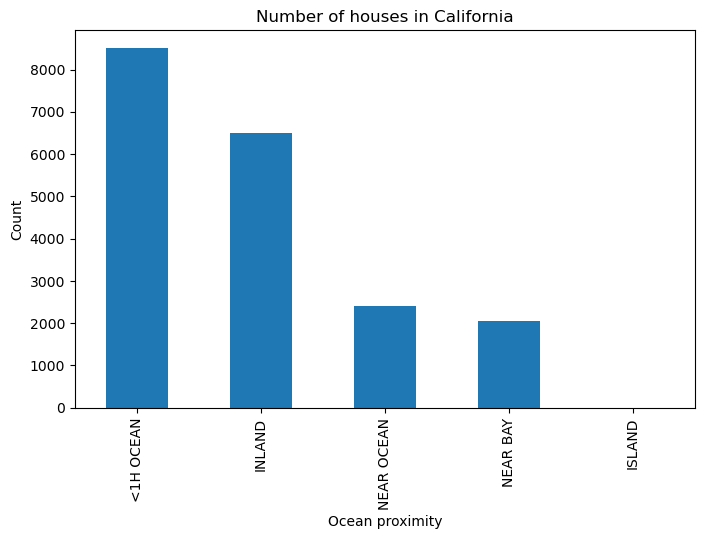

In [24]:
df_house.ocean_proximity.value_counts().plot(kind="bar")
plt.title('Number of houses in California')
plt.xlabel("Ocean proximity")
plt.ylabel('Count')
plt.show()

We could see that the majority of houses located within one hour to the ocean, and there are very little houses built on the island. We can barely see the number of houses located on the island from the histogram.

## Box plot of House Values based on Location

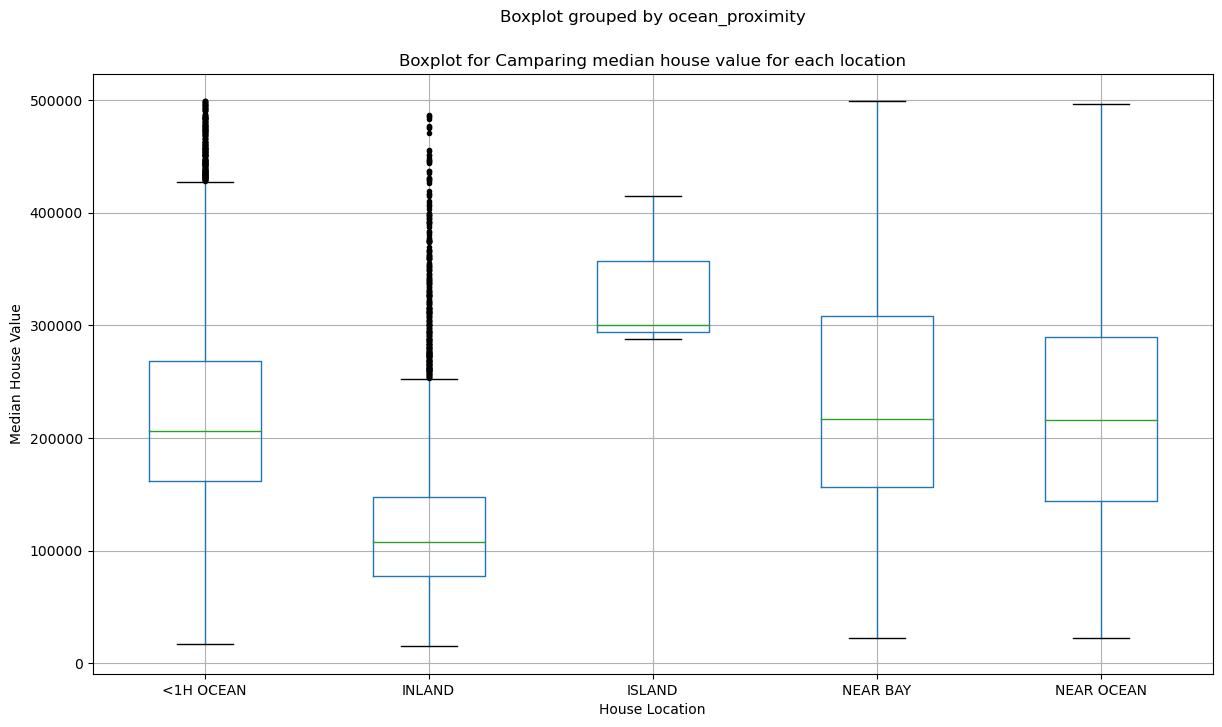

In [25]:
df_house.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(14,8))
plt.title('Boxplot for Camparing median house value for each location')
plt.xlabel("House Location")
plt.ylabel('Median House Value')
plt.show()

In [26]:
df_house.ocean_proximity.value_counts()

<1H OCEAN     8505
INLAND        6497
NEAR OCEAN    2406
NEAR BAY      2042
ISLAND           3
Name: ocean_proximity, dtype: int64

From the boxplots above, we could see that the median house value ranges from 200000 to 250000 dollars for houses located near bay, near ocean, and within one hour to the ocean. 

The houses built on island have higher house values compare to other groups. But there are only 3 houses buit in that area. Thus, it will not massively affect the overall housing price prediction.

However, there are many outliers exists for houses located inland, and a few outliers exists for houses located within one hour to the ocean.And both of these two categories have the most houses built in California. As a result, the outliers does affect our prediction to the house price in California.

### Price-Income-Ratio: PIR = sale price of the property / combined income of the buyers

In [46]:
## calculate the median price-income-ratio based on locations: PIR = sale price of the property / combined income of the buyers

df_ocean  =  df_house.loc[(df_house.ocean_proximity == "<1H OCEAN")]
PIR_OCEAN = df_ocean["median_house_value"].sum() / (df_ocean["median_income"].sum() * 10000)

df_inland  =  df_house.loc[(df_house.ocean_proximity == "INLAND")]
PIR_INLAND = df_inland["median_house_value"].sum() / (df_inland["median_income"].sum() * 10000)

df_island  =  df_house.loc[(df_house.ocean_proximity == "ISLAND")]
PIR_ISLAND = df_island["median_house_value"].sum() / (df_island["median_income"].sum() * 10000)

df_nearbay  =  df_house.loc[(df_house.ocean_proximity == "NEAR BAY")]
PIR_NEAR_BAY = df_nearbay["median_house_value"].sum() / (df_nearbay["median_income"].sum() * 10000)

df_nearocean  =  df_house.loc[(df_house.ocean_proximity == "NEAR OCEAN")]
PIR_NEAROCEAN = df_nearocean["median_house_value"].sum() / (df_nearocean["median_income"].sum() * 10000)

print(PIR_OCEAN, PIR_INLAND, PIR_ISLAND, PIR_NEAR_BAY, PIR_NEAROCEAN)

5.553359847437133 3.853921824175628 11.352386130650988 5.982680686966208 6.159388549372141


By linking the price of the property sold to the income of its buyer, the PIR provides an indication of the financial burden faced by home buyers when purchasing residential real estate. A higher PIR indicates a larger financial burden, requiring buyers to be more indebted or to rely on additional capital for their purchase. From the result we calculated, The median price-to-income ratio in island was 11.35, more than triple that of inland. We also observe the median PIR near ocean, PIR near bay and PIR within one hour to the ocaen are around 6. The result shows that houses inland are the most affordabale, and the houses in island are the most expensive houses,

# Project 2


## Message: Is it possible to judge the price of a House in California by the median income for households in a block of houses? 


Continue with the findings in previous project, we would like to categorize our data based on location and see if we could judge the housing price in California based on the median incoem for households in a block of houses.

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import pandas as pd
import numpy as np

In [28]:
#log in the token of datapane
!datapane login --token=865acaec43320cb6048702b14b7e27f8115e530c

Connected successfully to https://datapane.com as yixuan-lin0212


Configuring datapane logging in library mode


## Map of Distributions of Houses in CA

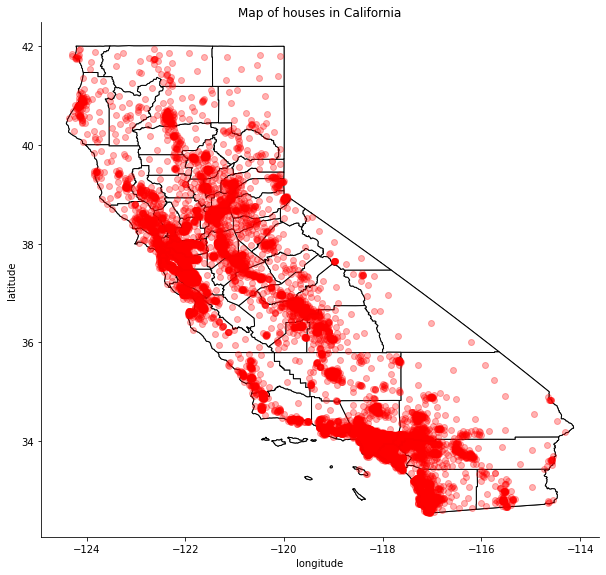

In [29]:
df_house["Coordinates"] = list(zip(df_house.longitude, df_house.latitude))
df_house["Coordinates"] = df_house["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_house, geometry="Coordinates")
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'")# the FIPS code for CA is 06

fig, gax = plt.subplots(figsize=(10,10))

state_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

gdf.plot(ax=gax, color='red', alpha = 0.3)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Map of houses in California')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

The map of houses in California shows that the houses in CA are clustered in middle and south of the state. And worth to notice that most of them are built toward the ocean. There are fewer houses in the north and inland areas.  

## Map of Median House Values in CA
We would like to see what is the distribution of median house values on the map of California: 
(The following map is created using plotly and the mapbox API)

In [30]:
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [33]:
## Plotting the map, using the mapbox api
mapbox_access_token = input("pk.eyJ1IjoiYW1iZXJsaW4wMiIsImEiOiJjbDBjeWgxZ2swM3lmM2NxdHRpZDByNXNvIn0.DAMA2covFn7PtkkNiJbbYA")
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_house,title="The map of median house value in California", lat="latitude", lon="longitude", zoom=4, color="median_house_value",
 color_continuous_scale=px.colors.diverging.RdBu_r, opacity = 0.2, mapbox_style="open-street-map")
fig.show()

pk.eyJ1IjoiYW1iZXJsaW4wMiIsImEiOiJjbDBjeWgxZ2swM3lmM2NxdHRpZDByNXNvIn0.DAMA2covFn7PtkkNiJbbYAlinyixuan10


### From the map, we can see some interesting things:  

Almost all the red spots (representing more expensive houses) are relatively close to the ocean, which illustrates the importance of the ocean proximity in our analysis. Even near the ocean, the north of the state is largely free of red spots. As we move from the ocean to the interior, the price of houses drops dramatically. Sacramento(located in the north part of California) is the capital of CA, but most of the houses in the city have a low value. Los Angeles, Santa Barbara, and San Diego (all near the Bay) have a lot of blocks with expensive houses.   

## Map of Median Household Income(measured in tens of thousands USD) in CA 
Next, I created a map of median income in CA to see whether the income will show the same distribution as median house value.

In [34]:
mapbox_access_token = input("pk.eyJ1IjoiYW1iZXJsaW4wMiIsImEiOiJjbDBjeWgxZ2swM3lmM2NxdHRpZDByNXNvIn0.DAMA2covFn7PtkkNiJbbYA")
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_house,title = "The map of Median income for households within a block of houses (10,000USD) in California ", lat="latitude", lon="longitude", zoom=4, color="median_income",
 color_continuous_scale=px.colors.diverging.RdBu_r, opacity = 0.2, mapbox_style="open-street-map")
fig.show()

pk.eyJ1IjoiYW1iZXJsaW4wMiIsImEiOiJjbDBjeWgxZ2swM3lmM2NxdHRpZDByNXNvIn0.DAMA2covFn7PtkkNiJbbYAlinyixuan10


### From the map of median income, we observe the following trends:
In this map, the red dots are not as obvious as in the previous one, but we can still observe the same distribution as in the map of median house value. A deep blue spot represents a lower median household income in a block of houses, and the pattern matches the pattern shown in the map of median house value.
Therefore, the map confirms that median income and house prices are positively correlated.

# Project 3

## Acquiring new data from web scraping: 

## Crime rate data web scraping 


Criminal behavior imposes direct costs to the victim and indirect costs to society. However, some secondary impacts are harder to verify than others, in particular the wider economic effects that can spread after a crime. While residents can avoid dangerous neighborhoods, keep themselves inside less, or move elsewhere, research shows that crime can move between neighborhoods in a manner similar to infectious diseases. According to a study published in "Estimates of the Impact of Crime Risk on Property Values from Megan's Laws" in 2008, housing prices within 0.1 miles of registered sex offenders drop by 4% on average. As a result, crime rate is set as a significant indicator for buyers to purchase a house. 

I would like to scrap the crime date from NeighborhoodScout® Crime Data: https://www.neighborhoodscout.com/ca/crime, and combine the dataset with my California housing dataset. This website provides crime cases for each district in the U.S, and defined crimes in two type: the property crimes and the violent crimes. Property crimes includes burglary, larceny-theft, and vehicle theft; violent crimes include homicide, rape, armed robbery, and aggravated assault. If I can successfully scrap the data, the crime dataset will include the number of crimes(violnt, property, and total), and the crime rate (per1,000 residents).   

However, it is not possible to merge the crime dataset with my housing dataset. This is because the crime dataset is community based(the coordinates are polygons), while the housing dataset is household based(the coordiantes are points). And there is no other common variables we can use to merge on. Thus, instead of merging these two dataset,I will plot a map showing the crime rate in each city in California. And then compare the map of crime rate for each city with the map of median house values in CA. By comparison, we could draw conclusions on whether the houses with the most values are located in the most safe cities in California.


## Challenges with crime rate data:


The data in NeighborhoodScout® Crime Data updates their data every year, and thus the web scraping process will also need to be reruned every year. On the website, we could implement web-based scraping since they provide summary tables with the number of crimes and crimerate for each communities. But the process will be tedious and time-consuming, we have to click each cities and check the summary tables. There are 482 cities in California, meaning we have to do this for 482 times. We need to find a way to simplify this process in the future.
Another problem is that the provided tables do not contain information about location, all location related data are being present in a GIS map, and I do not know how to scrap the data from an online GIS map. The further step is to learn how to scrap data from the website's pesented map.

## Earthquake data web scraping  

Though it is challenging to scrap the crime rate data, we could find other informative data and combine them with our dataset. Disasters destroy homes and displace residents, so it's expected that they would have a strong effect on the housing market. I want to analysis if the natural disaster(i.e. earthquakes) prevents buyers from buying houses in California.

### Step 1: Request the URL
First step of the web-based scraping is to request the URL.
Here, we are using the website: http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes  
Check the response status code for the HTTP request we placed, and if we have a successful response (eg.200), then there should be relevant content of the webpage in the obtained response. This can be checked by printing the content. This content received is the HTML source code of the webpage.

In [47]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes'
response = requests.get(web_url)

print('Status code\n', response.status_code)
print('\n--\n')
print('Content of the website\n', response.content[:2000])

Status code
 200

--

Content of the website
 b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en" dir="ltr">\n\t<head>\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n\t\t<meta http-equiv="Content-Style-Type" content="text/css" />\n\t\t<meta name="generator" content="MediaWiki 1.15.1" />\n\t\t<meta name="keywords" content="SOCR Data 021708 Earthquakes,SOCR Data" />\n\t\t<link rel="shortcut icon" href="/favicon.ico" />\n\t\t<link rel="search" type="application/opensearchdescription+xml" href="/socr/opensearch_desc.php" title="Socr (en)" />\n\t\t<link rel="alternate" type="application/rss+xml" title="Socr RSS Feed" href="/socr/index.php?title=Special:RecentChanges&amp;feed=rss" />\n\t\t<link rel="alternate" type="application/atom+xml" title="Socr Atom Feed" href="/socr/index.php?title=Special:RecentChanges&amp;feed=atom" /

### Step2: Get the Soup object: ``BeautifulSoup(response.content)``
The response content can be passed to a `BeautifulSoup()` method to obtain a soup object which looks very structured.

In [48]:
soup_object = BeautifulSoup(response.content)

### Step3:  Find the relevant tags and values
Go to the webpage and check the page source, find the table we are looking for. Here, we want the table "Earthquake data for magnitudes > 5 on the Richter's scale between 1969 and 2007"

In [49]:
data_table = soup_object.find_all('table', 'wikitable')[1]
all_values = data_table.find_all('tr')
all_values[:3] # Prints the first 3 captured tag elements

[<tr>
 <th> Date_(YYYY/MM/DD) </th><th> Time </th><th> Latitude </th><th> Longitude </th><th> Depth </th><th> Mag </th><th> Magt </th><th> Nst </th><th> Gap </th><th> Clo </th><th> RMS </th><th> SRC </th><th> EventID
 </th></tr>,
 <tr>
 <td> 1969/10/02 </td><td> 04:56:45.30 </td><td> 38.4978 </td><td> -122.6640 </td><td> 0.22 </td><td> 5.60 </td><td> ML </td><td> 38 </td><td> 104 </td><td> 52 </td><td> 0.22 </td><td> NCSN </td><td> -1003132
 </td></tr>,
 <tr>
 <td> 1969/10/02 </td><td> 06:19:56.39 </td><td> 38.4500 </td><td> -122.7535 </td><td> 5.14 </td><td> 5.70 </td><td> ML </td><td> 53 </td><td> 139 </td><td> 58 </td><td> 0.22 </td><td> NCSN </td><td> -1003135
 </td></tr>]

In [50]:
all_values[1].find_all('td')

[<td> 1969/10/02 </td>,
 <td> 04:56:45.30 </td>,
 <td> 38.4978 </td>,
 <td> -122.6640 </td>,
 <td> 0.22 </td>,
 <td> 5.60 </td>,
 <td> ML </td>,
 <td> 38 </td>,
 <td> 104 </td>,
 <td> 52 </td>,
 <td> 0.22 </td>,
 <td> NCSN </td>,
 <td> -1003132
 </td>]

### Step4: Write a for-loop and put the data into a dataframe structure

In [51]:
earthquake_df = pd.DataFrame(columns = ['Date','Time', 'Latitude','Longitude', 'Depth','Mag','Magt','Nst',
                                           'Gap', 'Clo', 'RMS', 'SRC', 'EventID']) # Create an empty dataframe
i = 0 # Initialise index to zero

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Date = values[0].text
    Time = values[1].text
    Latitude = values[2].text
    Longitude = values[3].text
    Depth = values[4].text
    Mag = values[5].text
    Magt = values[6].text
    Nst = values[7].text
    Gap = values[8].text
    Clo = values[9].text
    RMS = values[10].text
    SRC = values[11].text
    EventID = values[12].text.strip()
    
    earthquake_df.loc[i] = [Date,Time, Latitude,Longitude, Depth,Mag,Magt,Nst,
                                           Gap,Clo, RMS, SRC, EventID] # Store it in the dataframe as a row
    i += 1
    
# Print the first 5 rows of the datafrap
earthquake_df.head()

Date           Time   Latitude    Longitude    Depth     Mag  Magt  \
0   1969/10/02    04:56:45.30    38.4978    -122.6640     0.22    5.60    ML    
1   1969/10/02    06:19:56.39    38.4500    -122.7535     5.14    5.70    ML    
2   1972/02/24    15:56:50.99    36.5903    -121.1905     4.18    5.10    ML    
3   1974/11/28    23:01:24.59    36.9202    -121.4673     5.48    5.20    ML    
4   1975/06/07    08:46:23.51    40.5415    -124.2763    23.48    5.30    ML    

    Nst    Gap   Clo     RMS     SRC   EventID  
0   38    104    52    0.22    NCSN   -1003132  
1   53    139    58    0.22    NCSN   -1003135  
2   10    128     6    0.06    NCSN   -1009260  
3   51     61     4    0.13    NCSN   -1021953  
4   15    176     5    0.04    NCSN   -1024134

### Step5: save the scraped dataset to a csv document

In [52]:
earthquake_df.to_csv('Earthquake.csv', index=False)

## Combine Earthquake data with California Housing data
It is impossible to merge the new scaped dataset with our California Housing data since it dose not make sense and there are no common columns to merge. Instead, we could use maps to connnect these two dataset and compare these two maps.

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import pandas as pd
import numpy as np

In [54]:
earthquake_df['Latitude']=pd.to_numeric(earthquake_df.Latitude)
earthquake_df['Longitude']=pd.to_numeric(earthquake_df.Longitude)
earthquake_df['Depth']=pd.to_numeric(earthquake_df.Depth)
earthquake_df['Mag']=pd.to_numeric(earthquake_df.Mag)
earthquake_df['Nst']=pd.to_numeric(earthquake_df.Nst)
earthquake_df['Gap']=pd.to_numeric(earthquake_df.Gap)
earthquake_df['Clo']=pd.to_numeric(earthquake_df.Clo)
earthquake_df['RMS']=pd.to_numeric(earthquake_df.RMS)

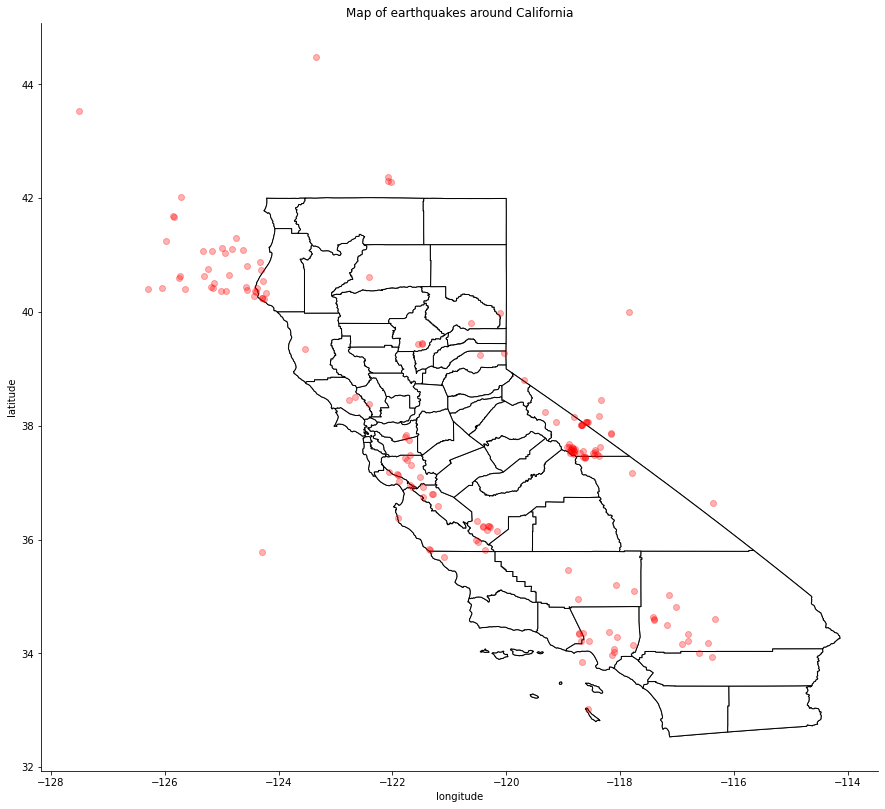

In [55]:
earthquake_df["Coordinates"] = list(zip(earthquake_df.Longitude, earthquake_df.Latitude))
earthquake_df["Coordinates"] = earthquake_df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(earthquake_df, geometry="Coordinates")
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'")# the FIPS code for CA is 06

fig, gax = plt.subplots(figsize=(15,15))

state_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

gdf.plot(ax=gax, color='red', alpha = 0.3)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Map of earthquakes around California')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

This earthquake dataseet have records on the Earthquake data for magnitudes > 5 on the Richter's scale between 1969 and 2007. I constructe a geometric data to show the frequency of the earthquakes happening in and around California. The map shows there are some areas suffured from earthquakes : the inland part of CA, and the west coast. Especially the earthquakes in central inland area has been recorded most frequently. 

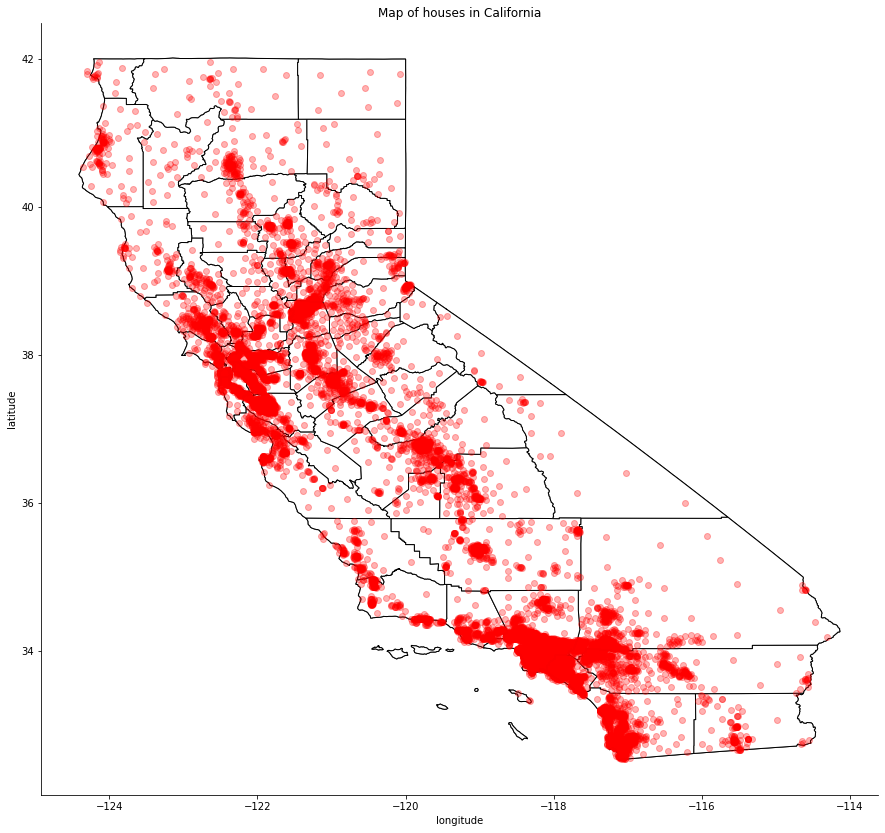

In [57]:
df_house["Coordinates"] = list(zip(df_house.longitude, df_house.latitude))
df_house["Coordinates"] = df_house["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_house, geometry="Coordinates")
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'")# the FIPS code for CA is 06

fig, gax = plt.subplots(figsize=(15,15))

state_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

gdf.plot(ax=gax, color='red', alpha = 0.3)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Map of houses in California')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

The map of houses in California shows that there are fewer houses in the north and inland areas, compared with the amount of houses built toward the ocean. We compare the map of houses in California with the Map of earthquakes around California, we could come up with the idea that very few map was buit in the inland area is because of the frequent earthquakes. Especially in the cities Mono and Inyo.  

We could interprete the economic intuition from comparing these two maps: People may feel threatened with property and personal safety when natural disasters occur frequently, thus reducing their desire to buy a house. When demand falls, the supply does not change, the price will fall. And if we have more data on the housing market, we may observe that in earthquake-prone areas, the volume of house transactions will also drop significantly.

# Conclusion

Maps for the median household income and the median house value clearly confirms our assumption that we could use the median household income to predict the house price in California. Based on our simple linear regression model from project one, as median income in a block of houses increases by 10,0000 USD, we can expect the house value to achieve an increase of 40688.04 USD.

We also investgate throught the relations between housing value and position. From the result of Price-to-Income Ratio(based on oceanProximity) we calculated, it shows that houses inland are the most affordabale, and the houses in island are the most expensive houses,
The histogram and boxplots provide insights on the relationship between location and house median value: houses near the bay values more. However, the house distribution map shows that there are very few houses built in the north of California,and the house value distribution map indicates that the north part of the state doesn’t have expensive houses, even near the ocean. Thus it is hard to tell by location.

The web scraping provides new information to our findings: we found that very few map was buit in the inland area because of the frequent earthquakes. Thus we draw to a conclusion that natural disasters reduce the demand to fall in the housing market, and thus might affect the market prices. 